# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

100%|██████████| 1.25M/1.25M [00:00<00:00, 56.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jessemostipak/hotel-booking-demand/versions/1


**lead_time**  
Jumlah hari yang berlalu antara tanggal pemesanan masuk ke sistem PMS dan tanggal kedatangan.

**stays_in_weekend_nights**  
Jumlah malam akhir pekan (Sabtu atau Minggu) yang dihabiskan tamu atau dipesan untuk menginap di hotel.

**stays_in_week_nights**  
Jumlah malam hari kerja (Senin hingga Jumat) yang dihabiskan tamu atau dipesan untuk menginap di hotel.

**market_segment**  
Penunjukan segmen pasar. Dalam kategori ini, istilah "TA" berarti "Travel Agents" (Agen Perjalanan) dan "TO" berarti "Tour Operators" (Operator Tur).

**distribution_channel**  
Saluran distribusi pemesanan. Istilah "TA" berarti "Travel Agents" (Agen Perjalanan) dan "TO" berarti "Tour Operators" (Operator Tur).

**previous_cancellations**  
Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini.

**previous_bookings_not_canceled**  
Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini.

**customer_type**  
Jenis pemesanan, terdiri dari empat kategori:  
- **Contract**: Pemesanan yang memiliki alokasi atau tipe kontrak lainnya yang terkait dengannya.  
- **Group**: Pemesanan yang terkait dengan kelompok.  
- **Transient**: Pemesanan yang tidak termasuk kelompok atau kontrak, dan tidak terkait dengan pemesanan transient lainnya.  
- **Transient-party**: Pemesanan yang bersifat transient, tetapi terkait dengan setidaknya satu pemesanan transient lainnya.

**adr**  
Rata-rata Tarif Harian (*Average Daily Rate*), yang didefinisikan dengan membagi jumlah total transaksi penginapan dengan jumlah malam menginap.

**total_of_special_requests**  
Jumlah permintaan khusus yang diajukan oleh pelanggan (misalnya tempat tidur kembar atau lantai atas).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/jessemostipak/hotel-booking-demand/versions/1/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Membuat variabel baru 'data_rel' yang hanya berisi fitur relevan
data = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                 'adr', 'total_of_special_requests', 'previous_cancellations',
                 'previous_bookings_not_canceled', 'customer_type', 'market_segment',
                 'distribution_channel']]

In [6]:
# deklarasi fitur numerik
fitur_Num = data.select_dtypes(include=['number'])

# deklarasi fitur kategorikal
fitur_Kat = data.select_dtypes(include=['object'])

# Menampilkan nama fitur
print(f"fitur numerikal yang relevan = {fitur_Num.columns.tolist()}")
print(f"fitur kategorikal yang relevan = {fitur_Kat.columns.tolist()}")

fitur numerikal yang relevan = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr', 'total_of_special_requests', 'previous_cancellations', 'previous_bookings_not_canceled']
fitur kategorikal yang relevan = ['customer_type', 'market_segment', 'distribution_channel']


In [7]:
nilai_hilang = data.isnull().sum()
nilai_hilang[nilai_hilang > 0]

,0


In [8]:
# data deskriptif fitur numerikal
data.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.927599,2.500302,101.831122,0.571363,0.087118,0.137097
std,106.863097,0.998613,1.908286,50.535790,0.792798,0.844336,1.497437
min,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,69.290000,0.000000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,94.575000,0.000000,0.000000,0.000000
75%,160.000000,2.000000,3.000000,126.000000,1.000000,0.000000,0.000000
max,737.000000,19.000000,50.000000,5400.000000,5.000000,26.000000,72.000000


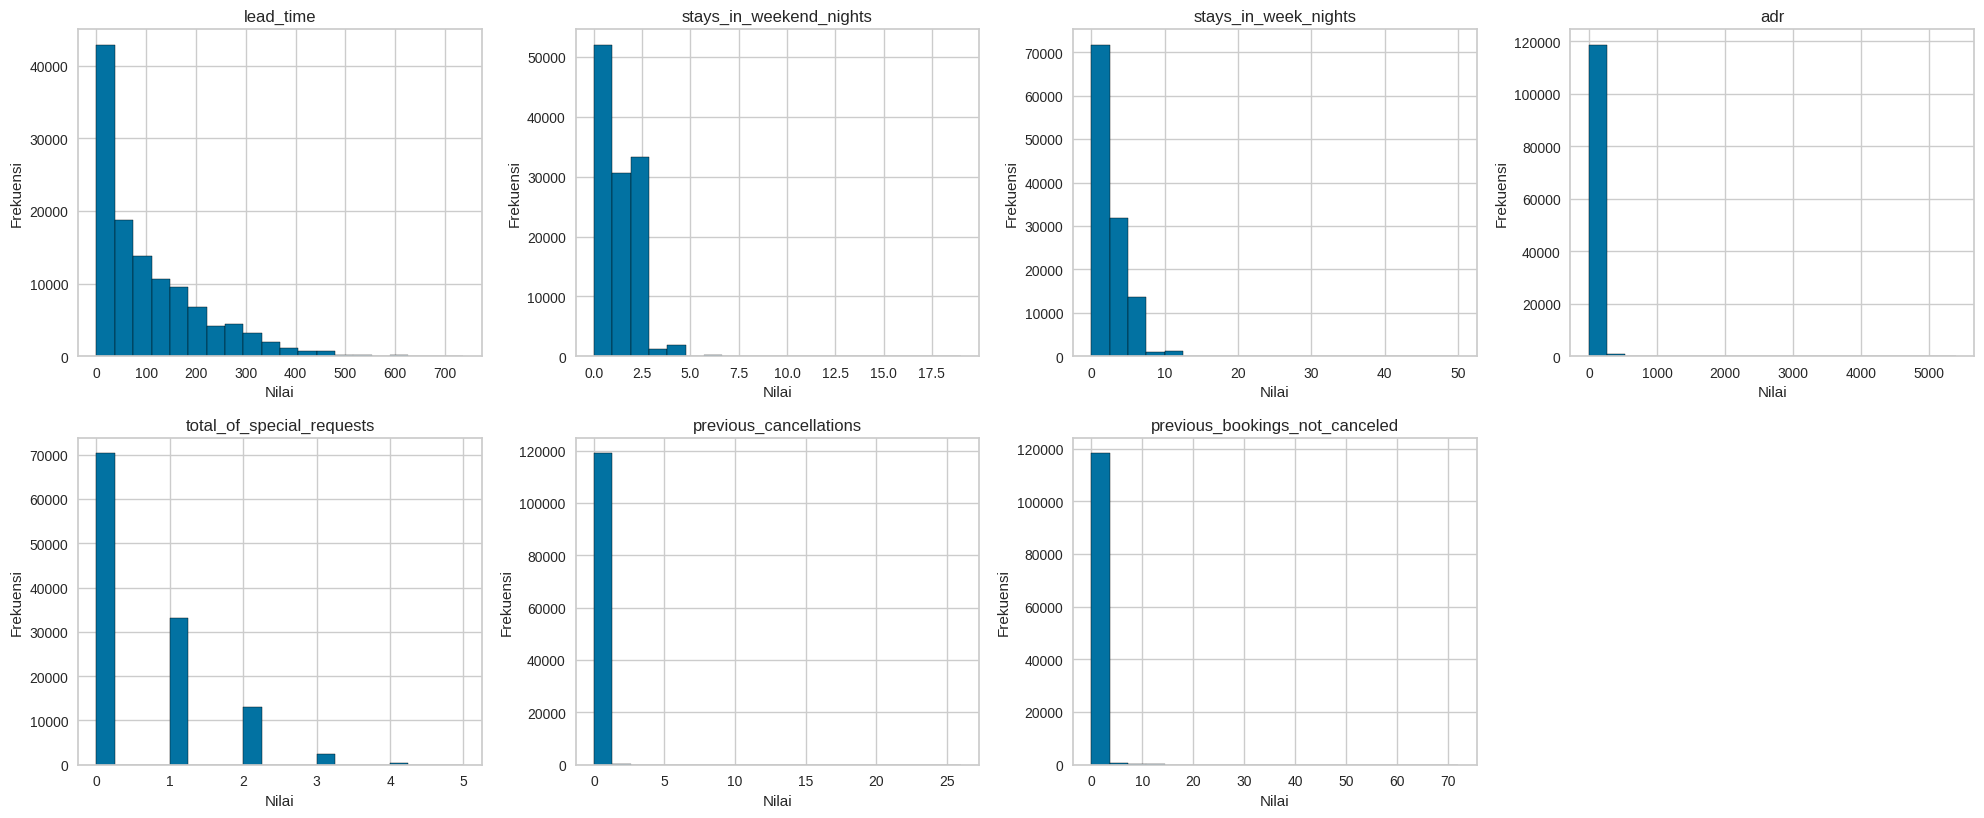

In [9]:
# Menghitung jumlah variabel
num_vars = data.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4
n_rows = -(-num_vars // n_cols)

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(fitur_Num.columns):
    data[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('Frekuensi')

# Menghapus subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

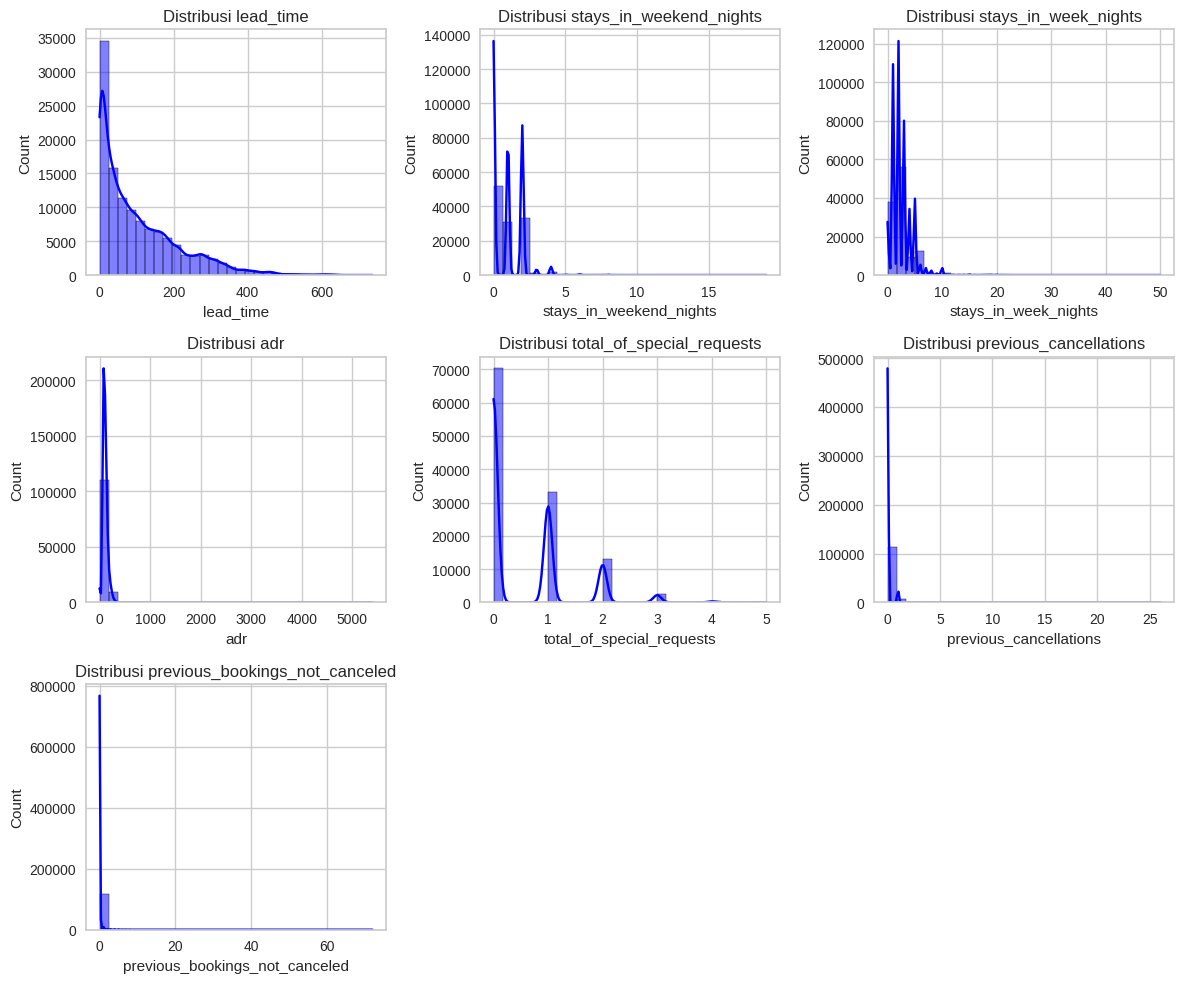

In [10]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(fitur_Num.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

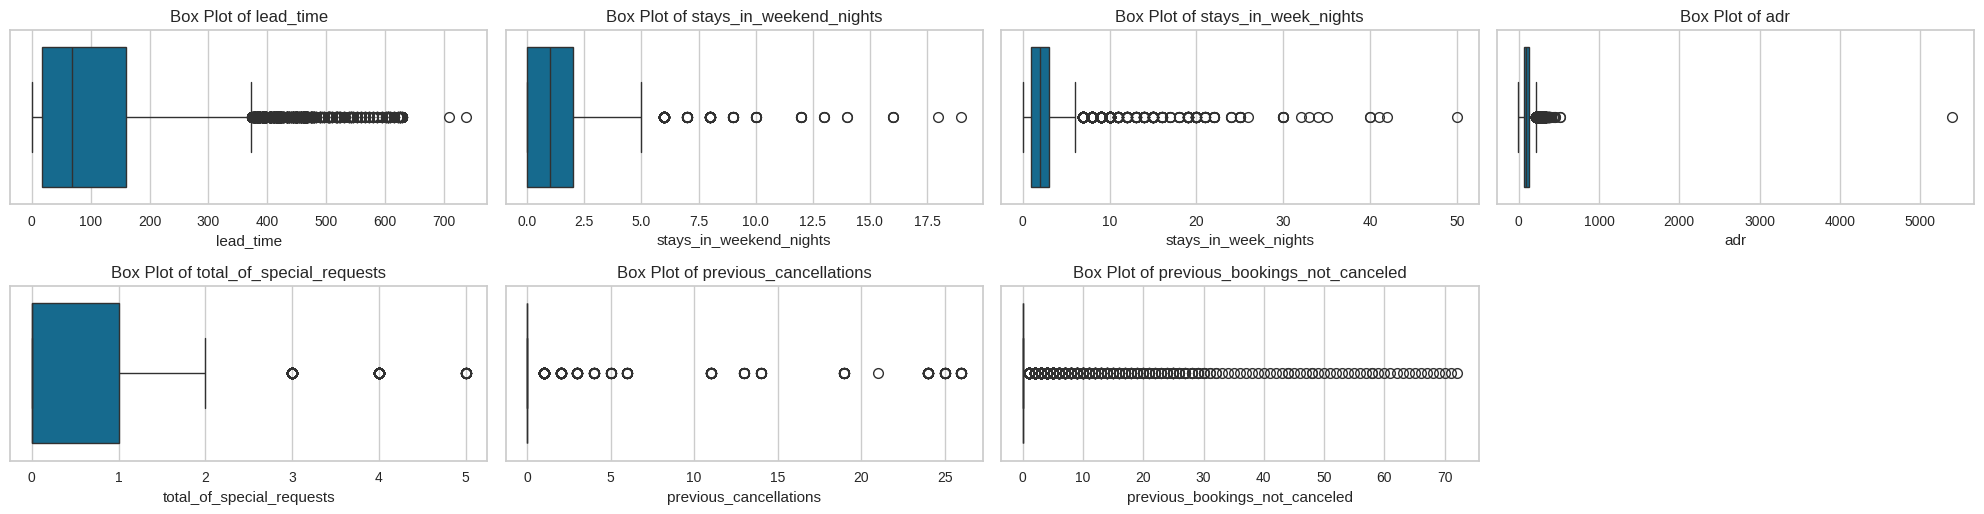

In [11]:
num_plots = len(fitur_Num)
n_cols, n_rows = 4 , 4

# Buat subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()

# Iterasi membuat box plot
for i, fitur in enumerate(fitur_Num):
    sns.boxplot(x=data[fitur], ax=axes[i])
    axes[i].set_title(f'Box Plot of {fitur}')
    axes[i].set_xlabel(fitur)

# Hapus subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

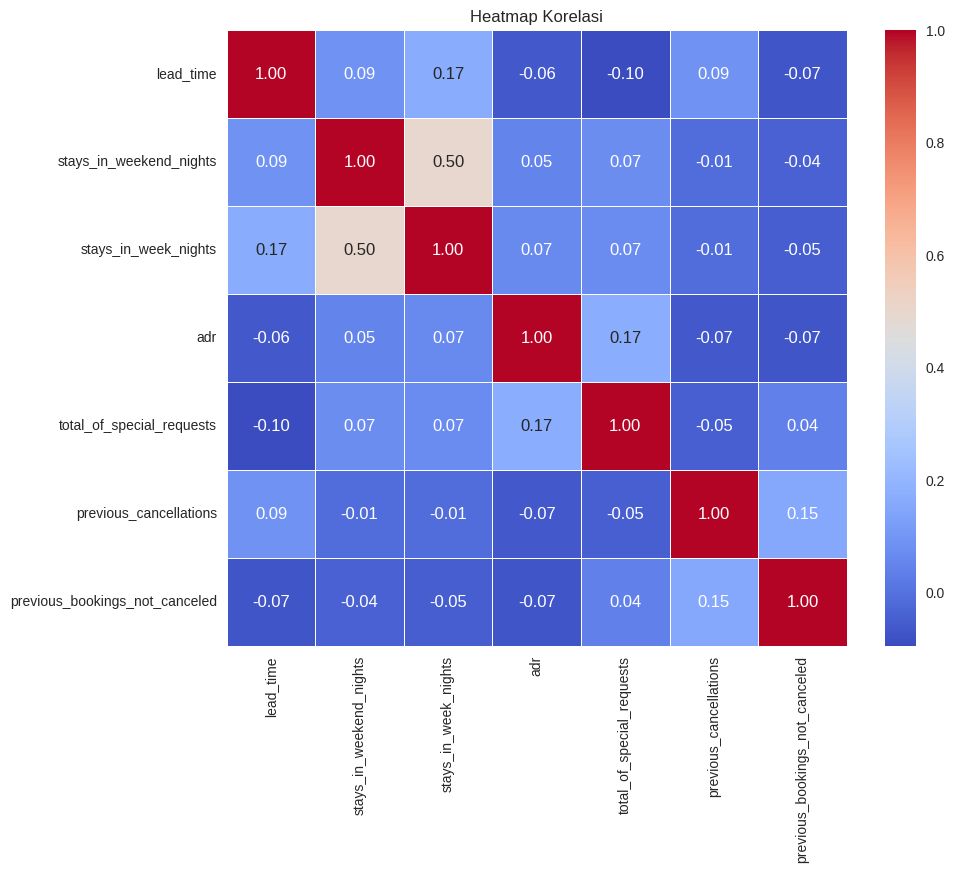

In [12]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(10, 8))
correlation_matrix = fitur_Num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

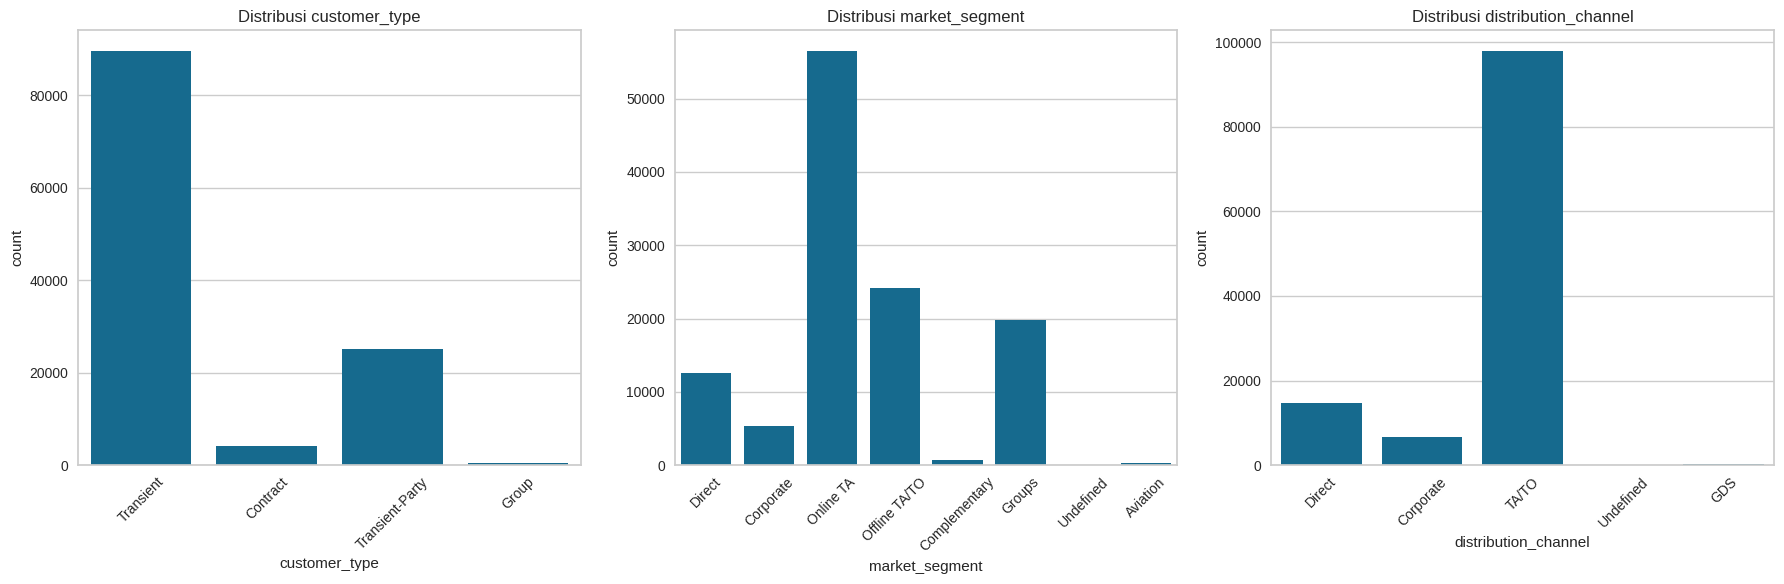

In [13]:
Kategorikal_cols = ['customer_type', 'market_segment', 'distribution_channel']

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 3
n_rows = 1

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6))
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(Kategorikal_cols):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribusi {column}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [14]:
# Mengidentifikasi data kosong
nilai_hilang = data.isnull().sum()
nilai_hilang[nilai_hilang > 0]

,0


In [15]:
# Mengidentifikasi baris duplikat
duplikat = data.duplicated()

print("Baris duplikat:")
data[duplikat]

Baris duplikat:


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled,customer_type,market_segment,distribution_channel
5,14,0,2,98.00,1,0,0,Transient,Online TA,TA/TO
15,68,0,4,97.00,3,0,0,Transient,Online TA,TA/TO
22,72,2,4,84.67,1,0,0,Transient,Direct,Direct
43,70,2,3,137.00,1,0,0,Transient,Direct,Direct
59,14,0,2,98.00,1,0,0,Transient,Online TA,TA/TO
...,...,...,...,...,...,...,...,...,...,...
119352,63,0,3,195.33,2,0,0,Transient-Party,Online TA,TA/TO
119353,63,0,3,195.33,2,0,0,Transient-Party,Online TA,TA/TO
119354,63,0,3,195.33,2,0,0,Transient-Party,Online TA,TA/TO
119367,212,2,5,85.59,0,0,0,Transient,Online TA,TA/TO


In [16]:
# Menghapus data duplikat
data_cleaned = data.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {data_cleaned.shape}")

Jumlah data setelah menghapus duplikat: (77687, 10)


In [17]:
# Tambahkan cancellation_ratio (rasio pembatalan terhadap total pemesanan (baik yang dibatalkan maupun tidak))
data_cleaned = data_cleaned.copy()
data_cleaned['cancellation_ratio'] = data_cleaned['previous_cancellations'] / (
    data_cleaned['previous_cancellations'] + data_cleaned['previous_bookings_not_canceled'] + 1)

In [18]:
# Fitur numerikal
numerikal_fitur = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                   'adr','total_of_special_requests', 'previous_cancellations',
                   'previous_bookings_not_canceled', 'cancellation_ratio']

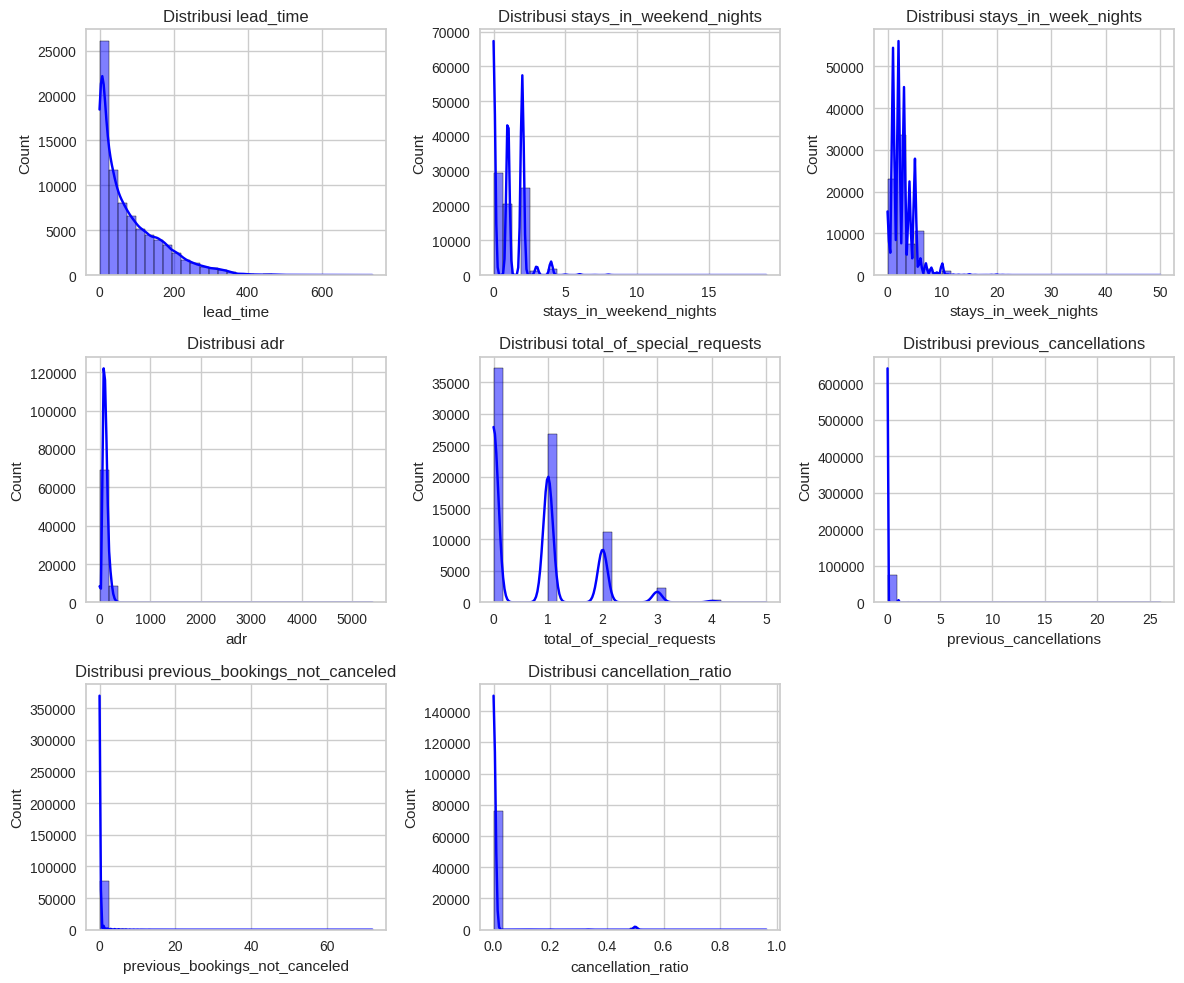

In [19]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerikal_fitur, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_cleaned[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

In [20]:
# Deteksi Outliers
for col in numerikal_fitur:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outliers
    outliers = data_cleaned[(data_cleaned[col] < lower_bound) | (data_cleaned[col] > upper_bound)]

    # Hitung jumlah dan proporsi outliers
    total_data = len(data_cleaned)
    count = len(outliers)
    prop = (count / total_data) * 100

    # Cetak hasil
    if count > 0:
        print(f"Fitur {col}: Jumlah outliers = {count}, Proporsi = {prop:.2f}%")
    else:
        print(f"Fitur {col}: Jumlah outliers = 0")

Fitur lead_time: Jumlah outliers = 1995, Proporsi = 2.57%
Fitur stays_in_weekend_nights: Jumlah outliers = 214, Proporsi = 0.28%
Fitur stays_in_week_nights: Jumlah outliers = 1489, Proporsi = 1.92%
Fitur adr: Jumlah outliers = 2324, Proporsi = 2.99%
Fitur total_of_special_requests: Jumlah outliers = 2578, Proporsi = 3.32%
Fitur previous_cancellations: Jumlah outliers = 1637, Proporsi = 2.11%
Fitur previous_bookings_not_canceled: Jumlah outliers = 3347, Proporsi = 4.31%
Fitur cancellation_ratio: Jumlah outliers = 1637, Proporsi = 2.11%


In [21]:
# Penanganan nilai negatif pada fitur adr agar bisa di transformasi
# Hitung proporsi nilai negatif
negative_adr_count = (data_cleaned['adr'] < 0).sum()
total_count = len(data_cleaned)
print(f"Jumlah nilai negatif: {negative_adr_count}")
print(f"Proporsi nilai negatif: {negative_adr_count / total_count * 100:.2f}%")

# Menghapus nilai negatif pada kolom 'adr' karena data negatif hanya 1
data_cleaned = data_cleaned[data_cleaned['adr'] >= 0]
data_cleaned.shape

Jumlah nilai negatif: 1
Proporsi nilai negatif: 0.00%


(77686, 11)

In [22]:
# Penanganan Outliers dengan transformasi karena data mengandung variasi
# Copy dataset untuk transformasi
df_transformed = data_cleaned.copy()

# Square Root Transform untuk fitur dengan banyak nilai nol
sqrt_features = ['previous_cancellations', 'previous_bookings_not_canceled', 'cancellation_ratio']
for feature in sqrt_features:
    df_transformed[feature] = np.sqrt(df_transformed[feature].clip(lower=0))

# Log Transform untuk fitur skewed tanpa nilai nol/negatif
log_features = ['lead_time', 'adr']
for feature in log_features:
    df_transformed[feature] = np.log1p(df_transformed[feature].fillna(0))

# Box-Cox Transform untuk fitur distribusi kompleks
boxcox_features = ['total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights']
for feature in boxcox_features:
    df_transformed[feature], _ = boxcox(df_transformed[feature].fillna(0).clip(lower=0) + 1)

# MinMax Scaling untuk semua fitur numerik
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_transformed[numerikal_fitur])

# Buat DataFrame hasil scaling
data_scaled = pd.DataFrame(data_scaled, columns=numerikal_fitur, index=df_transformed.index)

In [23]:
# Evaluasi Outliers
for col in numerikal_fitur:
    Q1 = data_scaled[col].quantile(0.25)
    Q3 = data_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outliers
    outliers = data_scaled[(data_scaled[col] < lower_bound) | (data_scaled[col] > upper_bound)]

    # Hitung jumlah dan proporsi outliers
    total_data = len(data_scaled)
    count = len(outliers)
    prop = (count / total_data) * 100

    # Cetak hasil
    if count > 0:
        print(f"Fitur {col}: Jumlah outliers = {count}, Proporsi = {prop:.2f}%")
    else:
        print(f"Fitur {col}: Jumlah outliers = 0")

Fitur lead_time: Jumlah outliers = 0
Fitur stays_in_weekend_nights: Jumlah outliers = 5, Proporsi = 0.01%
Fitur stays_in_week_nights: Jumlah outliers = 126, Proporsi = 0.16%
Fitur adr: Jumlah outliers = 2147, Proporsi = 2.76%
Fitur total_of_special_requests: Jumlah outliers = 0
Fitur previous_cancellations: Jumlah outliers = 1637, Proporsi = 2.11%
Fitur previous_bookings_not_canceled: Jumlah outliers = 3346, Proporsi = 4.31%
Fitur cancellation_ratio: Jumlah outliers = 1637, Proporsi = 2.11%


Data Outliers yang tersisa dibiarkan saja karena merupakan variasi data asli sehingga jika dihapus dapat mempengaruhi clustering

In [24]:
# Fitur kategorikal yang akan di-encode
kategorikal_fitur = ['customer_type', 'market_segment', 'distribution_channel']

# One-Hot Encoding
data_encoded = pd.get_dummies(data_cleaned, columns=kategorikal_fitur, drop_first=False)

# Konversi semua kolom hasil encoding dari boolean ke numerik
data_encoded = data_encoded.astype(float)

# Periksa hasil encoding
print("Hasil One-Hot Encoding:")
print(data_encoded.head().to_markdown())

# Gabungkan dengan data numerikal yang sudah distandarisasi
final_data = pd.concat([data_scaled, data_encoded.drop(columns=numerikal_fitur)], axis=1)

# Periksa dimensi data akhir
print("Dimensi data akhir setelah One-Hot Encoding dan scaling:", final_data.shape)

Hasil One-Hot Encoding:
|    |   lead_time |   stays_in_weekend_nights |   stays_in_week_nights |   adr |   total_of_special_requests |   previous_cancellations |   previous_bookings_not_canceled |   cancellation_ratio |   customer_type_Contract |   customer_type_Group |   customer_type_Transient |   customer_type_Transient-Party |   market_segment_Aviation |   market_segment_Complementary |   market_segment_Corporate |   market_segment_Direct |   market_segment_Groups |   market_segment_Offline TA/TO |   market_segment_Online TA |   market_segment_Undefined |   distribution_channel_Corporate |   distribution_channel_Direct |   distribution_channel_GDS |   distribution_channel_TA/TO |   distribution_channel_Undefined |
|---:|------------:|--------------------------:|-----------------------:|------:|----------------------------:|-------------------------:|---------------------------------:|---------------------:|-------------------------:|----------------------:|------------------------

In [25]:
final_data.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled,cancellation_ratio,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
count,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000,77686.000000
mean,0.549759,0.202639,0.259773,0.528068,0.315154,0.004814,0.009318,0.012838,0.038874,0.006694,0.847154,0.107278,0.002304,0.006552,0.043856,0.127951,0.041925,0.157107,0.620279,0.000026,0.051335,0.137991,0.002137,0.808473,0.000064
std,0.232511,0.171534,0.121762,0.086110,0.313948,0.035589,0.052173,0.091211,0.193297,0.081541,0.359841,0.309468,0.047947,0.080679,0.204776,0.334037,0.200420,0.363904,0.485320,0.005074,0.220681,0.344893,0.046176,0.393506,0.008022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.410066,0.000000,0.146169,0.503599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.604031,0.235783,0.237032,0.536995,0.522941,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.734717,0.372466,0.357482,0.573069,0.522941,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [26]:
# Memilih fitur yang ingin digunakan
fitur = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adr', 'total_of_special_requests', 'previous_bookings_not_canceled',
    'cancellation_ratio',
    'customer_type_Contract', 'customer_type_Group',
    'customer_type_Transient', 'customer_type_Transient-Party',
    'market_segment_Aviation', 'market_segment_Complementary',
    'market_segment_Corporate', 'market_segment_Direct',
    'market_segment_Groups', 'market_segment_Offline TA/TO',
    'market_segment_Online TA'
]

# Menyiapkan data X
X = final_data[fitur].values  # Mengambil nilai dari DataFrame

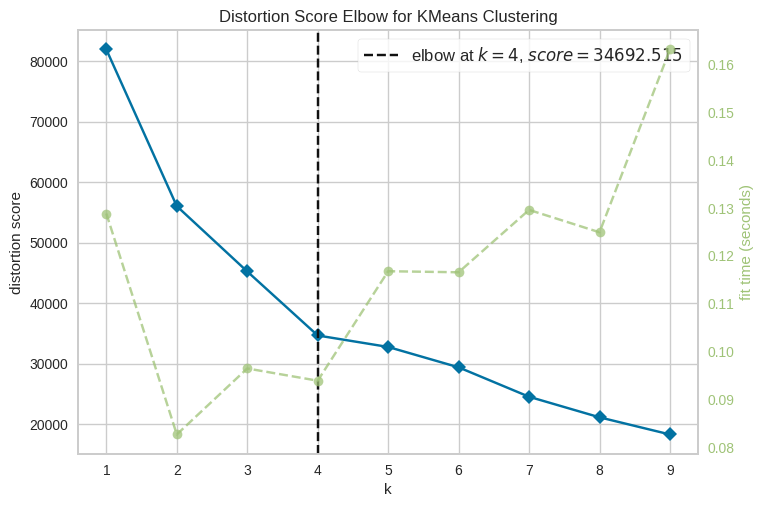

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Inisialisasi model KMeans dengan random_state untuk konsistensi
kmeans = KMeans(init='k-means++', random_state=42)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data yang sudah di-scale untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

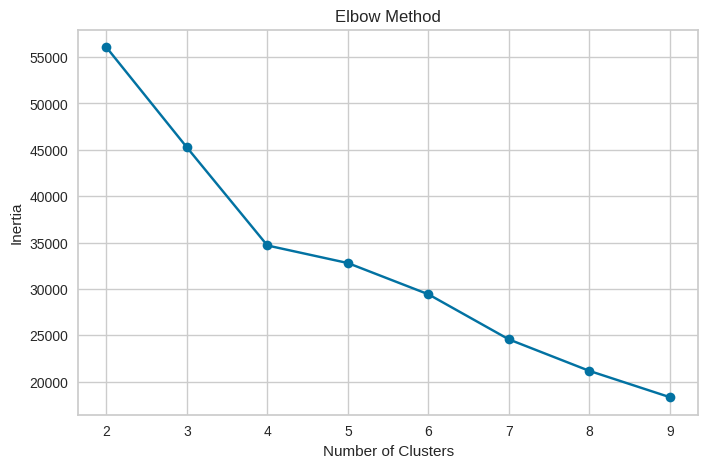

In [28]:
inertia = []
range_clusters = range(2, 10)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

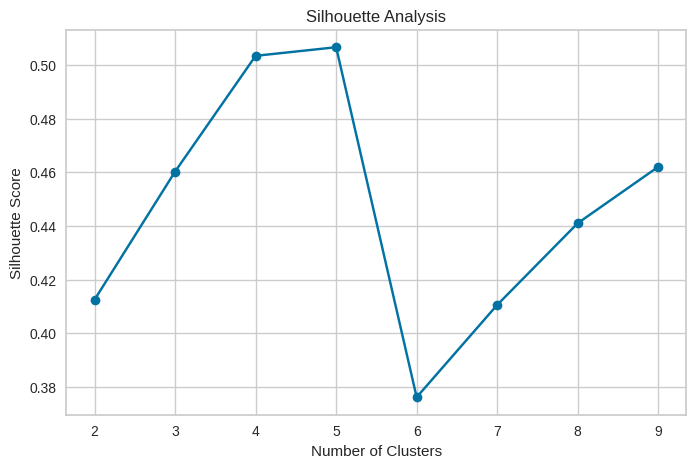

In [29]:
silhouette_scores = []
range_clusters = range(2, 10)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [30]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Evaluasi model
silhouette_avg = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
print(f"Silhouette Score : {silhouette_avg}")
print(f"Davies-Bouldin Index : {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score : 0.503447657758789
Davies-Bouldin Index : 1.0871772705838025
Calinski-Harabasz Index: 35281.04294623962


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [31]:
#Feature Selection dengan metode PCA
pca = PCA()
pca.fit(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

for i, cumulative_var in enumerate(cumulative_variance):
    if cumulative_var >= 0.60:  # Threshold 60% varians
        print(f"Jumlah komponen untuk 60% varians: {i+1}")
        break

Jumlah komponen untuk 60% varians: 3


In [32]:
# Inisialisasi PCA dengan 3 komponen utama
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Menampilkan kontribusi setiap fitur pada komponen utama
loadings = pd.DataFrame(pca.components_, columns=fitur, index=[f'PC{i+1}' for i in range(3)])
print(loadings.to_markdown())

|     |   lead_time |   stays_in_weekend_nights |   stays_in_week_nights |         adr |   total_of_special_requests |   previous_bookings_not_canceled |   cancellation_ratio |   customer_type_Contract |   customer_type_Group |   customer_type_Transient |   customer_type_Transient-Party |   market_segment_Aviation |   market_segment_Complementary |   market_segment_Corporate |   market_segment_Direct |   market_segment_Groups |   market_segment_Offline TA/TO |   market_segment_Online TA |
|:----|------------:|--------------------------:|-----------------------:|------------:|----------------------------:|---------------------------------:|---------------------:|-------------------------:|----------------------:|--------------------------:|--------------------------------:|--------------------------:|-------------------------------:|---------------------------:|------------------------:|------------------------:|-------------------------------:|---------------------------:|
| PC1 |   0.

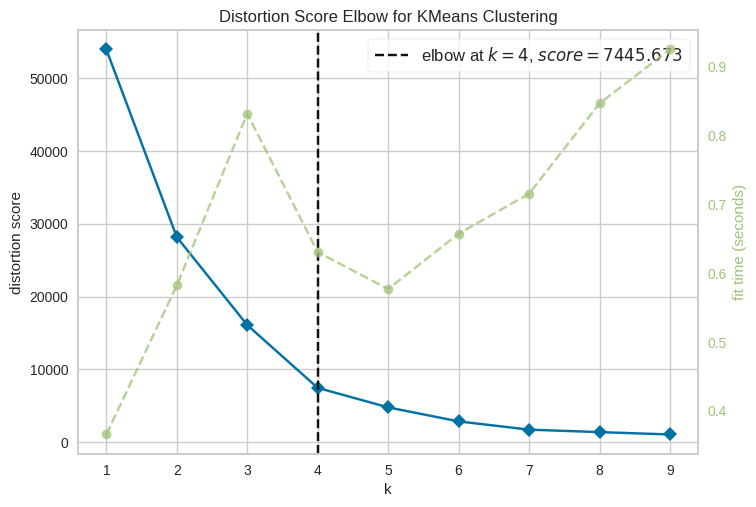

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# Inisialisasi model KMeans dengan random_state untuk konsistensi
kmeans = KMeans(init='k-means++', n_init=20, max_iter=500, random_state=42)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data hasil PCA
visualizer.fit(X_pca)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [34]:
kmeans = KMeans(init='k-means++', n_clusters=4,random_state=42)
kmeans.fit(X_pca)
labels_PCA = kmeans.labels_

# Evaluasi model
silhouette_avg = silhouette_score(X_pca, labels_PCA)
davies_bouldin = davies_bouldin_score(X_pca, labels_PCA)
calinski_harabasz = calinski_harabasz_score(X_pca, labels_PCA)
print(f"Silhouette Score : {silhouette_avg}")
print(f"Davies-Bouldin Index : {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Gabungkan label cluster dengan data asli
final_data['Cluster'] = labels_PCA

Silhouette Score : 0.7767984283883611
Davies-Bouldin Index : 0.5380274402173391
Calinski-Harabasz Index: 161728.5370878601


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

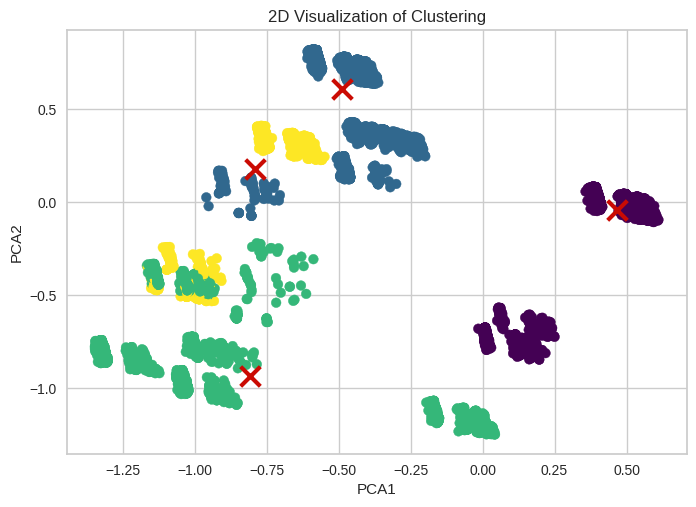

In [35]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title("2D Visualization of Clustering")

# centroids
centroids = kmeans.cluster_centers_

# Plot centroids dengan 'x' markers
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')

plt.show()

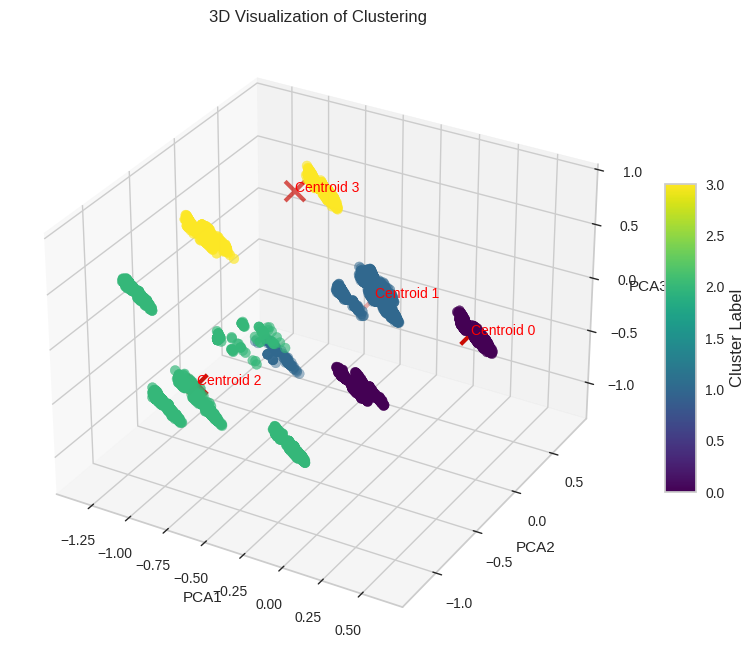

In [46]:
# Plot 3D untuk visualisasi clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot untuk data
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap='viridis', s=50)

# Menambahkan centroid ke plot
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=200, linewidths=3, color='r')

# Menambahkan label centroid
for idx, centroid in enumerate(centroids):
    ax.text(centroid[0], centroid[1], centroid[2], f"Centroid {idx}", fontsize=10, color='red')

# Menambahkan label pada sumbu dan judul
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title("3D Visualization of Clustering")

# Menambahkan colorbar dengan label
cb = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cb.set_label('Cluster Label', fontsize=12)

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [47]:
# Analisis statistik setiap cluster
cluster_analysis = final_data.groupby('Cluster').mean()
print(cluster_analysis.to_markdown())

|   Cluster |   lead_time |   stays_in_weekend_nights |   stays_in_week_nights |      adr |   total_of_special_requests |   previous_cancellations |   previous_bookings_not_canceled |   cancellation_ratio |   customer_type_Contract |   customer_type_Group |   customer_type_Transient |   customer_type_Transient-Party |   market_segment_Aviation |   market_segment_Complementary |   market_segment_Corporate |   market_segment_Direct |   market_segment_Groups |   market_segment_Offline TA/TO |   market_segment_Online TA |   market_segment_Undefined |   distribution_channel_Corporate |   distribution_channel_Direct |   distribution_channel_GDS |   distribution_channel_TA/TO |   distribution_channel_Undefined |
|----------:|------------:|--------------------------:|-----------------------:|---------:|----------------------------:|-------------------------:|---------------------------------:|---------------------:|-------------------------:|----------------------:|--------------------------:|

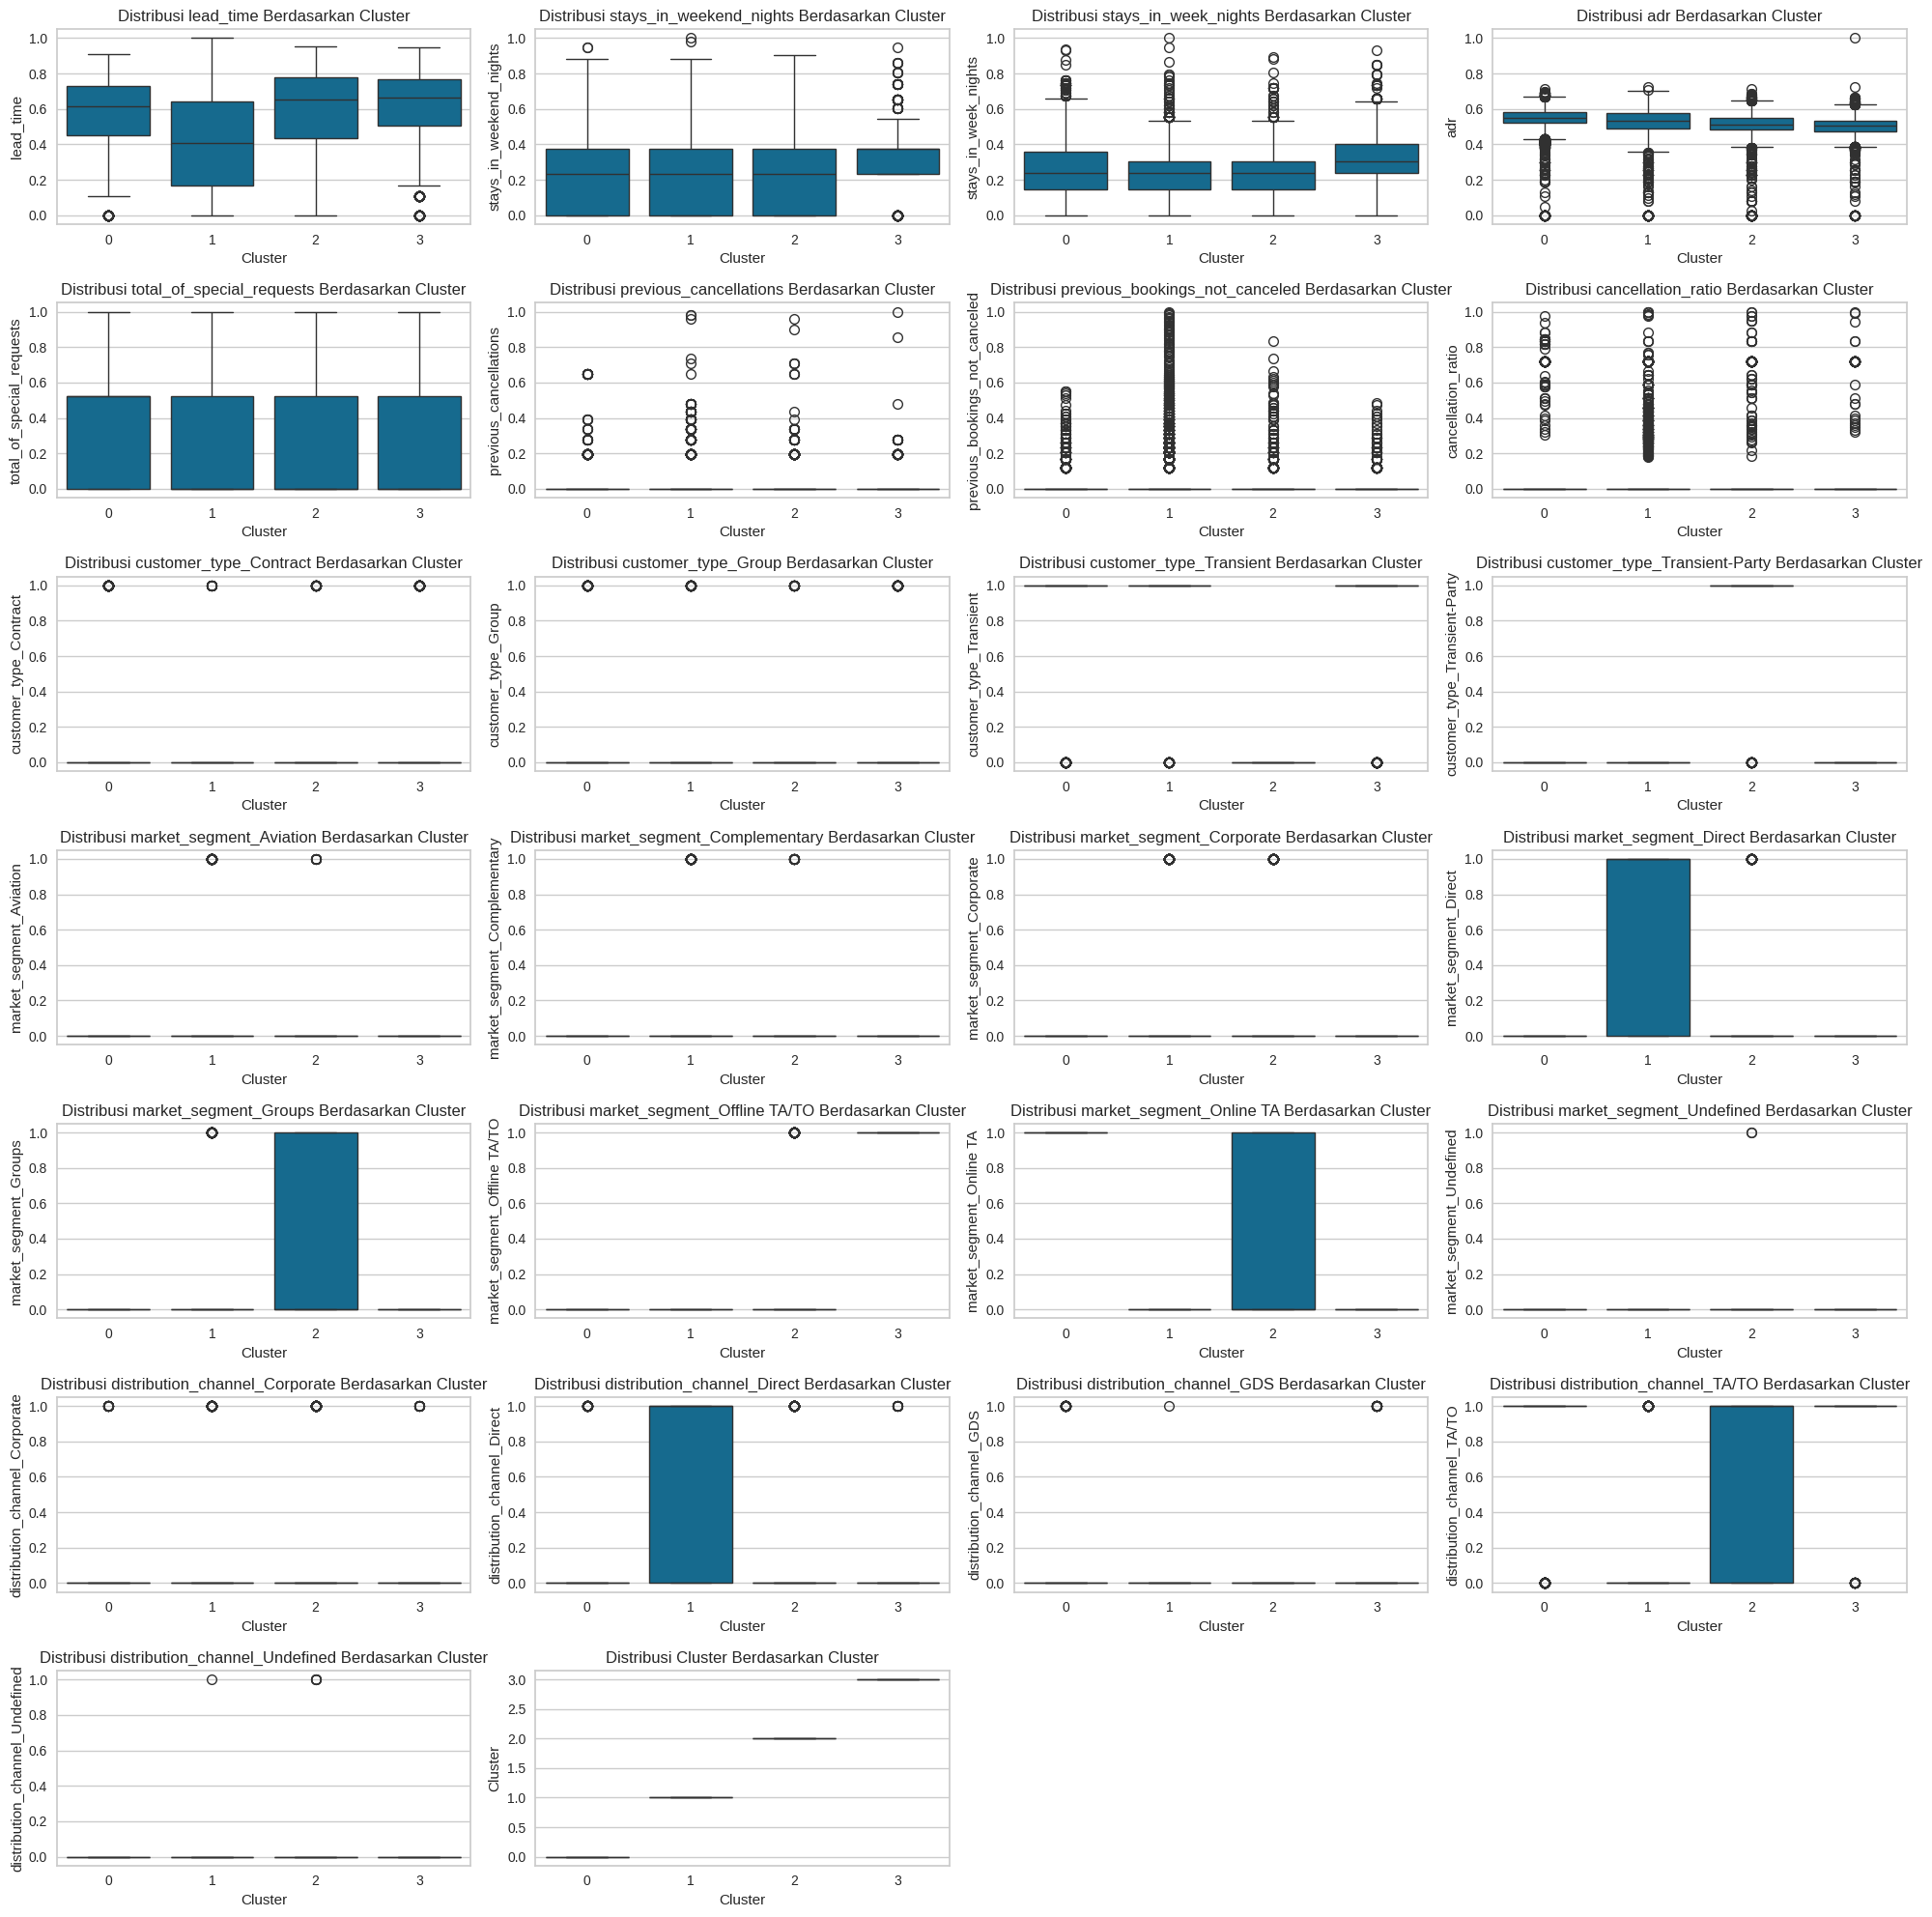

In [48]:
# deklarasi fitur numerik
fitur_Nums = final_data.select_dtypes(include=['number'])

num_plots = len(fitur_Nums)
n_cols, n_rows = 4, 7

# buat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# Iterasi membuat box plot
for i, feature in enumerate(fitur_Nums):
    sns.boxplot(x='Cluster', y=feature, data=final_data, ax=axes[i])
    axes[i].set_title(f"Distribusi {feature} Berdasarkan Cluster")
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

# hapus subplot tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Cluster 1: Pelanggan Online Travel Agent dengan Perencanaan Matang**

**Karakteristik Utama**:  
1. **Waktu Pemesanan (Lead Time: 0.569)**: Pelanggan dalam cluster ini memesan jauh sebelum tanggal kedatangan, menunjukkan pola perencanaan yang sangat baik.  
2. **Durasi Tinggal di Akhir Pekan (Stays in Weekend Nights: 0.201)**: Lama tinggal pada akhir pekan relatif singkat dibandingkan cluster lainnya.  
3. **Durasi Tinggal di Hari Kerja (Stays in Week Nights: 0.259)**: Lama tinggal pada hari kerja sedikit lebih lama dibandingkan akhir pekan, menunjukkan preferensi untuk tinggal di hari kerja.  
4. **Pendapatan Harian Rata-rata (ADR: 0.547)**: Tarif harian di cluster ini adalah yang tertinggi di antara semua cluster, mengindikasikan pelanggan lebih memilih akomodasi dengan fasilitas atau layanan premium.  
5. **Jumlah Permintaan Khusus (Total Special Requests: 0.387)**: Cluster ini memiliki tingkat permintaan layanan tambahan tertinggi, seperti permintaan khusus terkait kamar atau fasilitas.  
6. **Riwayat Pemesanan yang Tidak Dibatalkan (Previous Bookings Not Canceled: 0.0017)**: Hampir tidak ada riwayat pemesanan sebelumnya yang tidak dibatalkan.  
7. **Tingkat Pembatalan (Cancellation Ratio: 0.007)**: Tingkat pembatalan di cluster ini sangat rendah.  
8. **Tipe Pelanggan (Customer Type)**: Hampir seluruh pelanggan termasuk dalam kategori **Transient (96.9%)**, yang berarti mereka memesan untuk kebutuhan individu atau perjalanan non-grup.  
9. **Segmen Pasar (Market Segment)**: Hampir seluruh pelanggan berasal dari **Online Travel Agent (100%)**, menunjukkan ketergantungan penuh pada platform digital untuk pemesanan.  
10. **Saluran Distribusi (Distribution Channel)**: Sebagian besar pemesanan menggunakan saluran agen perjalanan dan operator tur.

---

**Cluster 2: Pelanggan Korporat dengan Pemesanan Langsung**

**Karakteristik Utama**:  
1. **Waktu Pemesanan (Lead Time: 0.410)**: Cluster ini memiliki lead time yang lebih pendek, menunjukkan kecenderungan pemesanan mendekati waktu kedatangan.  
2. **Durasi Tinggal di Akhir Pekan (Stays in Weekend Nights: 0.162)**: Lama tinggal pada akhir pekan sangat rendah dibandingkan cluster lainnya.  
3. **Durasi Tinggal di Hari Kerja (Stays in Week Nights: 0.227)**: Lama tinggal di hari kerja juga relatif pendek.  
4. **Pendapatan Harian Rata-rata (ADR: 0.508)**: Tarif harian lebih rendah dibandingkan cluster lainnya, menunjukkan pelanggan ini lebih sensitif terhadap harga.  
5. **Jumlah Permintaan Khusus (Total Special Requests: 0.236)**: Permintaan tambahan lebih rendah dibanding cluster lainnya.  
6. **Riwayat Pemesanan yang Tidak Dibatalkan (Previous Bookings Not Canceled: 0.0418)**: Punya riwayat pemesanan sebelumnya yang tidak dibatalkan lebih tinggi dibandingkan cluster lainnya, menunjukkan tingkat loyalitas tertentu.  
7. **Tingkat Pembatalan (Cancellation Ratio: 0.026)**: Cluster ini memiliki tingkat pembatalan tertinggi di antara semua cluster.  
8. **Tipe Pelanggan (Customer Type)**: Didominasi oleh pelanggan **Transient (98.9%)**, dengan kontribusi kecil dari tipe pelanggan grup (0.9%).  
9. **Segmen Pasar (Market Segment)**: Sebagian besar berasal dari **Corporate (19.8%)** dan pemesanan langsung.  
10. **Saluran Distribusi (Distribution Channel)**: Dominasi saluran pemesanan langsung dan perusahaan.

---

**Cluster 3: Pelanggan Kecil dengan Sensitivitas Harga Tinggi**

**Karakteristik Utama**:  
1. **Waktu Pemesanan (Lead Time: 0.591)**: Memesan cukup jauh sebelum tanggal kedatangan, mencerminkan perencanaan yang baik.  
2. **Durasi Tinggal di Akhir Pekan (Stays in Weekend Nights: 0.183)**: Lama tinggal pada akhir pekan sedikit lebih tinggi dibandingkan Cluster 1.  
3. **Durasi Tinggal di Hari Kerja (Stays in Week Nights: 0.249)**: Lama tinggal pada hari kerja hampir setara dengan Cluster 0.  
4. **Pendapatan Harian Rata-rata (ADR: 0.494)**: Tarif harian terendah, menunjukkan pelanggan ini sangat sensitif terhadap harga.  
5. **Jumlah Permintaan Khusus (Total Special Requests: 0.233)**: Permintaan tambahan cukup rendah.  
6. **Riwayat Pemesanan yang Tidak Dibatalkan (Previous Bookings Not Canceled: 0.0071)**: Hampir tidak ada pemesanan yang tidak dibatalkan sebelumnya.  
7. **Tingkat Pembatalan (Cancellation Ratio: 0.024)**: Tingkat pembatalan rendah.  
8. **Tipe Pelanggan (Customer Type)**: Hampir seluruh pelanggan termasuk dalam kategori **Transient-Party (98.5%)**, menunjukkan pemesanan untuk kelompok kecil atau keluarga.  
9. **Segmen Pasar (Market Segment)**: Pemesanan berasal dari agen perjalanan offline (29.2%) dan online (23.7%).  
10. **Saluran Distribusi (Distribution Channel)**: Didominasi oleh agen perjalanan.

---

**Cluster 4: Kelompok Besar dengan Lama Tinggal yang Panjang**

**Karakteristik Utama**:  
1. **Waktu Pemesanan (Lead Time: 0.609)**: Memiliki lead time tertinggi, menunjukkan perencanaan matang untuk perjalanan kelompok.  
2. **Durasi Tinggal di Akhir Pekan (Stays in Weekend Nights: 0.274)**: Lama tinggal akhir pekan tertinggi di antara semua cluster.  
3. **Durasi Tinggal di Hari Kerja (Stays in Week Nights: 0.313)**: Lama tinggal pada hari kerja juga tertinggi, menunjukkan preferensi untuk tinggal lebih lama.  
4. **Pendapatan Harian Rata-rata (ADR: 0.497)**: Tarif harian cukup rata-rata dibandingkan cluster lainnya.  
5. **Jumlah Permintaan Khusus (Total Special Requests: 0.161)**: Permintaan khusus paling rendah, menunjukkan kebutuhan layanan yang sederhana.  
6. **Riwayat Pemesanan yang Tidak Dibatalkan (Previous Bookings Not Canceled: 0.0030)**: Hampir tidak ada pemesanan sebelumnya yang tidak dibatalkan.  
7. **Tingkat Pembatalan (Cancellation Ratio: 0.011)**: Tingkat pembatalan cukup rendah.  
8. **Tipe Pelanggan (Customer Type)**: Sebagian besar pelanggan berasal dari kategori **Groups (100%)**, menunjukkan pemesanan untuk kelompok besar.  
9. **Segmen Pasar (Market Segment)**: Pemesanan hampir seluruhnya melalui agen perjalanan.  
10. **Saluran Distribusi (Distribution Channel)**: Saluran distribusi didominasi oleh agen perjalanan.

Tulis hasil interpretasinya di sini.
1. **Cluster 1**:  Pelanggan dalam cluster ini adalah individu atau kelompok kecil yang biasanya memesan jauh-jauh hari melalui platform digital seperti Online Travel Agent. Mereka memiliki daya beli tinggi dan lebih memilih layanan premium, dengan tingkat pembatalan yang sangat rendah. Hal ini menjadikan mereka segmen yang sangat dapat diandalkan untuk menghasilkan pendapatan yang stabil dalam jangka panjang. Mereka juga memiliki potensi besar untuk meningkatkan pendapatan melalui promosi early bird dan penawaran layanan tambahan yang menarik.

2. **Cluster 2**: Cluster ini terdiri dari pelanggan korporat yang cenderung memesan menjelang tanggal kedatangan. Meskipun mereka memiliki tingkat pembatalan yang lebih tinggi, pelanggan dalam kelompok ini menunjukkan loyalitas yang kuat, seperti terlihat dari riwayat pemesanan mereka yang jarang dibatalkan. Mereka lebih sensitif terhadap harga, namun tetap memberikan kontribusi yang stabil berkat pemesanan dalam jumlah besar, baik melalui saluran langsung maupun corporate. Untuk melayani segmen ini, strategi promosi langsung dan penawaran khusus untuk perusahaan akan sangat efektif.

3. **Cluster 3**: Pelanggan dalam cluster ini biasanya terdiri dari kelompok kecil atau keluarga yang sangat memperhatikan harga dan mencari penawaran terbaik. Mereka sering menggunakan agen perjalanan, baik online maupun offline, untuk mendapatkan harga yang paling ekonomis. Meskipun kontribusi mereka per malam lebih kecil dibandingkan cluster lainnya, tingkat pembatalan mereka cukup rendah, menjadikan mereka sumber volume pemesanan yang konsisten. Dengan penawaran yang tepat, seperti paket hemat, bundling layanan, atau kerjasama dengan agen perjalanan, mereka dapat menjadi pelanggan yang menguntungkan.

4. **Cluster 4**:  Cluster ini didominasi oleh kelompok besar (grup) yang menginap dalam durasi yang lebih panjang, baik pada hari kerja maupun akhir pekan. Mereka cenderung memesan jauh-jauh hari dan biasanya melalui agen perjalanan. Dengan tarif harian yang cukup kompetitif, segmen ini ideal untuk memaksimalkan tingkat hunian hotel. Penawaran khusus untuk grup, seperti ruang pertemuan dan layanan katering, serta strategi untuk meningkatkan masa inap (long-stay) dapat membantu memaksimalkan keuntungan dari segmen ini.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [50]:
final_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled,cancellation_ratio,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,Cluster
0,0.883976,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.314879,0.0,0.146169,0.503905,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,0.399618,0.0,0.146169,0.503905,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,0.410066,0.0,0.237032,0.534668,0.522941,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [52]:
final_data.to_csv('Hotel_Booking_Clustering.csv', index=False)